In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

pd.set_option('precision', 15)
pd.options.mode.chained_assignment = None
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",6000)
pd.set_option('max_colwidth',100)
pd.set_option('display.max_colwidth', -1) # show all text in one column

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [3]:
# !{sys.executable} -m pip install ggplot
from ggplot import * # if error, see below

pd.__path__  # find .../site-packages/.. full path

# vim ..../site-packages/ggplot/stats/smoothers.py 
    # change 'from pandas.lib import Timestamp' -> 'from pandas import Timestamp'

# https://github.com/yhat/ggpy/tree/master/docs

['/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/pandas']

# gwas part

In [4]:
%store -r f
pd.read_csv(f,nrows = 5, sep = '\t')

,./gwas_vep.10.tab,chromosome,position,reference_allele,other_allele,eaf,European_N,beta,se,p.value,i2,q_p.value,AllEthnicities_N,log10BF,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,Extra,snp_name1,snp_name2,snps
0,rs190955300,10,10000586,T,C,0.988599,2712,0.483237548366036,0.448718491423650,0.281494,0.000000,0.678191,2712,-0.26413,10:10000586,C,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,10_10000586_T_C_b37,10_10000586_T_C_b37,10_10000586_T_C_b37
1,rs111964749,10,100041602,C,T,0.987765,1325,0.025864608461657,0.502170838142661,0.958906,0.614740,0.107158,1325,-0.43612,10:100041602,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,10_100041602_C_T_b37,10_100041602_C_T_b37,10_100041602_C_T_b37
2,rs59724357,10,100075076,G,T,0.985700,22455,-0.073790791691533,0.130623645120023,0.572157,0.239464,0.208399,34986,0.18840,10:100075076,T,-,-,-,intergenic_variant,-,-,-,-,-,-,IMPACT=MODIFIER,10_100075076_G_T_b37,10_100075076_G_T_b37,10_100075076_G_T_b37
3,rs117798253,10,100144090,C,T,0.983510,8270,0.087452113184496,0.163256999203310,0.592207,0.300948,0.220891,8270,-0.43949,10:100144090,T,ENSG00000119943,ENST00000370575,Transcript,intron_variant,-,-,-,-,-,-,IMPACT=MODIFIER;STRAND=-1;SYMBOL=PYROXD2;SYMBOL_SOURCE=HGNC;HGNC_ID=23517,10_100144090_C_T_b37,10_100144090_C_T_b37,10_100144090_C_T_b37
4,rs117798253,10,100144090,C,T,0.983510,8270,0.087452113184496,0.163256999203310,0.592207,0.300948,0.220891,8270,-0.43949,10:100144090,T,ENSG00000119943,ENST00000464808,Transcript,downstream_gene_variant,-,-,-,-,-,-,IMPACT=MODIFIER;DISTANCE=2868;STRAND=-1;SYMBOL=PYROXD2;SYMBOL_SOURCE=HGNC;HGNC_ID=23517,10_100144090_C_T_b37,10_100144090_C_T_b37,10_100144090_C_T_b37


In [5]:
column_dict =  {'./gwas_vep.10.tab':'MarkerName', 'p.value':'P','snps':'snps'}
sorter = np.append(range(1,23,1),['X'])


In [6]:
data = pd.read_csv(f,sep = '\t',index_col = False,usecols = list(column_dict))

list(column_dict)

data.head()

['./gwas_vep.10.tab', 'p.value', 'snps']

,./gwas_vep.10.tab,p.value,snps
0,rs190955300,0.281494,10_10000586_T_C_b37
1,rs111964749,0.958906,10_100041602_C_T_b37
2,rs59724357,0.572157,10_100075076_G_T_b37
3,rs117798253,0.592207,10_100144090_C_T_b37
4,rs117798253,0.592207,10_100144090_C_T_b37


In [7]:
filename = os.path.basename(f)
filename

'gwas_not_sun.tab'

In [8]:
data = data.rename(columns = column_dict)
data = data.dropna(axis=0, how='any')
data = data.drop_duplicates()
data.head()

,MarkerName,P,snps
0,rs190955300,0.281494,10_10000586_T_C_b37
1,rs111964749,0.958906,10_100041602_C_T_b37
2,rs59724357,0.572157,10_100075076_G_T_b37
3,rs117798253,0.592207,10_100144090_C_T_b37
6,rs78913788,0.295075,10_100145275_G_A_b37


In [9]:
data['CHR'] = data['snps'].str.split('_').str[0]
data['BP']  = data['snps'].str.split('_').str[1]
del data['snps']
data.head()
print('{} unique snps in {}'.format(data.MarkerName.nunique(), filename))

,MarkerName,P,CHR,BP
0,rs190955300,0.281494,10,10000586
1,rs111964749,0.958906,10,100041602
2,rs59724357,0.572157,10,100075076
3,rs117798253,0.592207,10,100144090
6,rs78913788,0.295075,10,100145275


511958 unique snps in gwas_not_sun.tab


In [10]:
data['BP'] = data['BP'].astype(int)
data['P'] = data['P'].astype(float)

In [11]:
chrom_len = data.groupby('CHR')['BP'].max().reset_index() # find max bp on each chrom
chrom_len['CHR_rank'] = chrom_len['CHR'].map(dict(zip(sorter,range(len(sorter)))))
chrom_len = chrom_len.sort_values('CHR_rank') # rank the chrom
chrom_len.head()

,CHR,BP,CHR_rank
0,1,249222325,0
11,2,243043939,1
15,3,197779684,2
16,4,190797305,3
17,5,180694838,4


In [12]:
BP = chrom_len.BP.tolist()
cum_BP = [0]
for i in range(1,len(sorter)):
    cum_BP.append(cum_BP[i-1] + BP[i-1])  
chrom_len['cum_BP'] = cum_BP
chrom_len['center'] = chrom_len['cum_BP'] + chrom_len['BP']/2

chrom_len.tail() # cum the BP from previous chrom

,CHR,BP,CHR_rank,cum_BP,center
10,19,59099888,18,2657079130,2686629074.0
12,20,62917506,19,2716179018,2747637771.0
13,21,48101335,20,2779096524,2803147191.5
14,22,51142692,21,2827197859,2852769205.0
22,X,154929412,22,2878340551,2955805257.0


In [13]:
cum_data = pd.merge(data,chrom_len, on = 'CHR', how = 'inner',suffixes=('_data', '_max'))
cum_data['cum_BP'] = cum_data['cum_BP'] + cum_data['BP_data']
cum_data['-log10P'] = -np.log10(cum_data['P'])
cum_data["CHR_rank"] = cum_data["CHR_rank"].astype('category')
cum_data = cum_data[['MarkerName','-log10P','CHR_rank','cum_BP']]

cum_data.head()

,MarkerName,-log10P,CHR_rank,cum_BP
0,rs190955300,0.550530857632038,9,1688891391
1,rs111964749,0.018223963926493,9,1778932407
2,rs59724357,0.242484784357467,9,1778965881
3,rs117798253,0.227526463472545,9,1779034895
4,rs78913788,0.530067584203786,9,1779036080


In [14]:
colors = ["blue", "orange"] * (len(sorter)//2) 
if len(sorter)%2 != 0:
    colors.append('blue')
    
p = ggplot(cum_data,aes(x='cum_BP', y='-log10P', color='CHR_rank')) + \
    geom_point() + \
    scale_color_manual(values = colors) + \
    scale_x_continuous('Chrom',labels = chrom_len['CHR'].tolist(), breaks= chrom_len['center'].tolist()) + \
    ggtitle("{}".format(filename)) 

manhathan plot for gwas_not_sun.tab


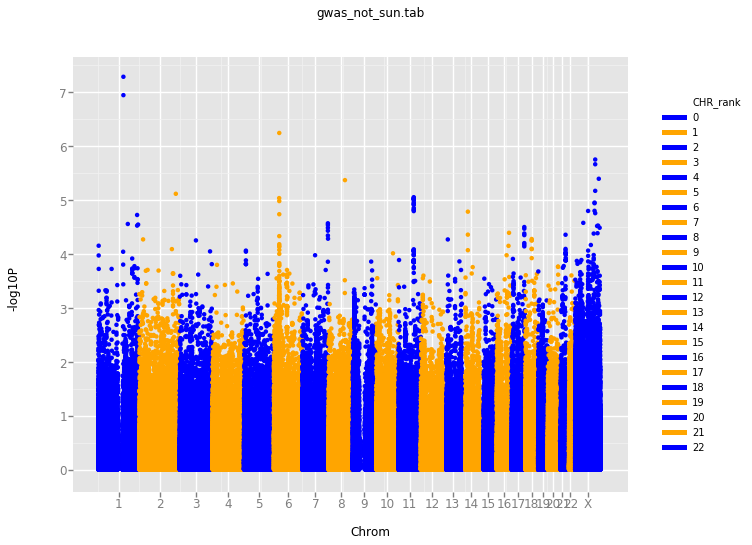

In [15]:
p.save('{}.png'.format(filename))
print('manhathan plot for {}'.format(filename))

# eqtl part

In [6]:
import pandas as pd
import numpy as np
import os
from ggplot import *

import rpy2 
from rpy2.robjects import r, pandas2ri,numpy2ri
from rpy2.robjects.packages import importr
r['options'](warn=-1)
pandas2ri.activate()
numpy2ri.activate()

pd.set_option('precision', 15)
pd.options.mode.chained_assignment = None
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",6000)
pd.set_option('max_colwidth',100)
pd.set_option('display.max_colwidth', -1) 


def chromosome_sort_helper(chrom_list):
    
    chrom_list = [str(chrom) for chrom in chrom_list]
    digits = np.array(sorted([chrom for chrom in chrom_list if chrom.isdigit()]))
    xyz = sorted([chrom for chrom in chrom_list if not chrom.isdigit()])
    
    return np.append(digits, xyz)

def chrom_len_helper(data, CHR = 'CHR'):    
    sorter = chromosome_sort_helper(data[CHR].unique())
    chrom_len = data.groupby(CHR)['BP'].max().reset_index() # find max bp on each chrom
    chrom_len['CHR_rank'] = chrom_len[CHR].map(dict(zip(sorter,range(len(sorter)))))
    chrom_len = chrom_len.sort_values('CHR_rank') # rank the chrom
    
    BP = chrom_len.BP.tolist()
    cum_BP = [0]
    for i in range(1,len(sorter)):
        cum_BP.append(cum_BP[i-1] + BP[i-1])  
    chrom_len['cum_BP'] = cum_BP
    chrom_len['center'] = chrom_len['cum_BP'] + chrom_len['BP']/2
    chrom_len["CHR_rank"] = chrom_len["CHR_rank"].astype('category')
    
    del chrom_len['BP']
    return chrom_len

def eqtl_plot(f, path,
              sep=',',
              column_dict =  {'./eqtl.10.tab':'Gene','variant_id':'snps'}):
    
    filename = os.path.basename(f)
    save_path = os.path.join(path, '{}_eqtl_ggplot'.format(filename))
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    
    data = pd.read_csv(f,sep = sep,index_col = False,usecols = list(column_dict))
    data = data.rename(columns = column_dict)
    data = data.dropna(axis=0, how='any')
    data['CHR'] = data['snps'].str.split('_').str[0]
    data['BP']  = data['snps'].str.split('_').str[1]
    data['CHR'] = data['CHR'].astype(str)
    data['BP'] = data['BP'].astype(int)
    
    
    print('{} unique snps in {}'.format(data.snps.nunique(), filename))
    print('{} unique Gene in {}'.format(data.Gene.nunique(), filename))
    
    biomaRt = importr('biomaRt') 
    ensembl = biomaRt.useEnsembl(biomart="ensembl", dataset="hsapiens_gene_ensembl",GRCh=37)
    gene_data = biomaRt.getBM(
        attributes= np.array(['ensembl_gene_id','chromosome_name','start_position','end_position']),
        filters = 'ensembl_gene_id', values = data.Gene.unique(), mart = ensembl)
    gene_data = pandas2ri.ri2py(gene_data)   
    gene_data['BP'] = (gene_data['start_position'] + gene_data['end_position'])/2
    gene_data['chromosome_name'] = gene_data['chromosome_name'].astype(str)
    
    gene_chrom_len = chrom_len_helper(gene_data,CHR = 'chromosome_name')
    gene_data_1 = pd.merge(gene_data,gene_chrom_len, on = 'chromosome_name', how = 'inner')
    gene_data_1['cum_BP'] = gene_data_1['cum_BP'] + gene_data_1['BP']
    gene_data_1 = gene_data_1[['ensembl_gene_id','cum_BP']]

    snps_chrom_len = chrom_len_helper(data)
    snps_data = pd.merge(data,snps_chrom_len, on = 'CHR', how = 'inner')
    snps_data['cum_BP'] = snps_data['cum_BP'] + snps_data['BP']
    snps_data = snps_data[['Gene','snps','cum_BP']]
    
    plot_data = pd.merge(snps_data, gene_data_1,
                     left_on = 'Gene',
                     right_on = 'ensembl_gene_id',
                     how = 'inner',
                     suffixes = ('_snps','_gene'))
    gene_chrom_len.to_csv(os.path.join(save_path,'gene_chrom_len.csv'), index = False)
    snps_chrom_len.to_csv(os.path.join(save_path,'snps_chrom_len.csv'), index = False)
    plot_data.to_csv(os.path.join(save_path,'plot_data.csv'), index = False)

    p = ggplot(plot_data,aes(x='cum_BP_snps', y='cum_BP_gene')) + \
        geom_point() + \
        scale_x_continuous('snps',labels = snps_chrom_len['CHR'].tolist(), breaks= snps_chrom_len['center'].tolist()) + \
        scale_y_continuous('gene',labels = gene_chrom_len['chromosome_name'].tolist(), breaks= gene_chrom_len['center'].tolist()) + \
        ggtitle("{}".format(filename)) 

    p.save(os.path.join(save_path,'{}.png'.format(filename)))
    print('manhathan plot for {}'.format(filename))

if __name__ == "__main__":
    eqtl_plot(eqtl_file, save_path, column_dict = {'gene_id':'Gene','variant_id':'snps'})

512147 unique snps in eqtl_sun.tab
24350 unique Gene in eqtl_sun.tab


/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [>------------------------------]   4% eta: 12s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [=>-----------------------------]   6% eta: 13s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [==>----------------------------]   8% eta: 13s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [==>--------------------

/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [=======================>-------]  78% eta:  4s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [========================>------]  80% eta:  4s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [========================>------]  82% eta:  3s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Batch submitting query [=========================>-----]  84% eta:  3s
  warnings.warn(x, RRuntimeWarning)
/home/ec2-user/anaconda3/envs/BioSandbox/lib/python3.6/site-packages/rpy2/rinterface/__init__.py

manhathan plot for eqtl_sun.tab


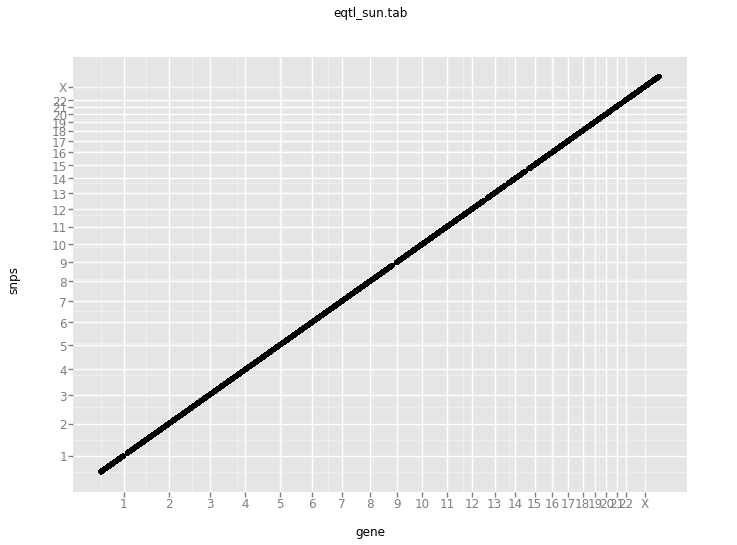

In [7]:
%store -r save_path
%store -r f

eqtl_plot(f,save_path)